In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
encuesta = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/google_forms_corregido.csv', sep= ";")


In [ ]:
resultados_todos_juntos = pd.read_csv(
    f'/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Respuestas/Respuesta_viviendas.csv',
    sep=";"
)

In [5]:
encuesta.columns

Index(['Marca temporal', 'Dirección de correo electrónico', 'distrito_1',
       'distrito_2', 'farmacias', 'hospitales', 'escuelas', 'supermercados',
       'gimnasio', 'cinema', 'centros_comerciales', 'restaurantes', 'parques',
       'tipo_vivienda', 'budget', 'tamaño', 'rooms', 'bathrooms',
       'caracteristicas', 'edad', 'estudios', 'ingresos', 'air_conditioning',
       'terrace', 'garden', 'parking', 'swimming_pool', 'booxroom'],
      dtype='object')

In [6]:
encuesta_resum = encuesta[['Dirección de correo electrónico','tipo_vivienda', 'budget', 'tamaño', 'rooms', 'bathrooms',
       'caracteristicas', 'air_conditioning',
       'terrace', 'garden', 'parking', 'swimming_pool', 'booxroom' ]]

In [7]:
resultados_todos_juntos.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización'],
      dtype='object')

In [8]:
resultados_todos_juntos['origen_vivienda'].unique()

array(['random', 'modelo_precio'], dtype=object)

In [9]:
resultados_todos_juntos_model = resultados_todos_juntos[resultados_todos_juntos['origen_vivienda'] =='modelo_precio']
resultados_todos_juntos_model = resultados_todos_juntos_model[['propertyCode','correo_electronico', 'price' ,'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code',]]

In [ ]:
# Cambiamos los nombres para mejor compresión
nombres_columnas_resultados = {
    'price': 'budget',
    'size': 'tamaño',
    'rooms': 'rooms',
    'bathrooms': 'bathrooms',
    'hasParkingSpace': 'parking',
    'hasSwimmingPool': 'swimming_pool',
    'hasTerrace': 'terrace',
    'hasAirConditioning': 'air_conditioning',
    'hasBoxRoom': 'booxroom',
    'hasGarden': 'garden',
    'propertyType': 'tipo_vivienda', 
    'correo_electronico': 'Dirección de correo electrónico'
}


resultados_todos_juntos_model.rename(columns=nombres_columnas_resultados, inplace=True)


resultados_todos_juntos_model = resultados_todos_juntos_model[[ 'propertyCode',
    'Dirección de correo electrónico', 'tipo_vivienda', 'budget', 'tamaño', 'rooms', 'bathrooms',
    'air_conditioning', 'terrace', 'garden', 
    'parking', 'swimming_pool', 'booxroom'
]]

In [11]:
resultados_todos_juntos_model.columns

Index(['propertyCode', 'Dirección de correo electrónico', 'tipo_vivienda',
       'budget', 'tamaño', 'rooms', 'bathrooms', 'air_conditioning', 'terrace',
       'garden', 'parking', 'swimming_pool', 'booxroom'],
      dtype='object')

In [12]:
resultados_todos_juntos_model

,propertyCode,Dirección de correo electrónico,tipo_vivienda,budget,tamaño,rooms,bathrooms,air_conditioning,terrace,garden,parking,swimming_pool,booxroom
1,100335872,carlos.garciaparrado@decathlon.com,flat,380000,94,3,2,1,0,0,0,0,0
2,104301471,carlos.garciaparrado@decathlon.com,flat,300000,72,2,2,1,1,0,0,0,0
3,103991475,carlos.garciaparrado@decathlon.com,flat,320000,104,3,3,0,0,0,0,0,0
5,103265545,carlos.garciaparrado@decathlon.com,flat,560000,72,2,2,1,1,0,0,1,0
6,100452504,carlos.garciaparrado@decathlon.com,flat,410000,93,4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,98564560,faty.alvarezrodriguez@gmail.com,flat,298000,60,2,1,0,0,0,0,0,0
964,81535683,faty.alvarezrodriguez@gmail.com,flat,395000,50,1,1,1,0,0,0,0,0
966,98801232,faty.alvarezrodriguez@gmail.com,flat,298000,60,2,1,0,0,0,0,0,0
969,91539302,faty.alvarezrodriguez@gmail.com,studio,450000,40,0,1,1,0,0,0,0,0


In [13]:
resultados_todos_juntos_model.columns

Index(['propertyCode', 'Dirección de correo electrónico', 'tipo_vivienda',
       'budget', 'tamaño', 'rooms', 'bathrooms', 'air_conditioning', 'terrace',
       'garden', 'parking', 'swimming_pool', 'booxroom'],
      dtype='object')

In [ ]:

caracteristicas_media = ['budget', 'tamaño', 'rooms', 'bathrooms']
caracteristicas_count = ['air_conditioning', 'terrace', 'garden', 'parking', 'swimming_pool', 'booxroom']


aggfunc = {
    **{col: 'mean' for col in caracteristicas_media}, 
    **{col: lambda x: (x == 1).mean() *100 for col in caracteristicas_count} 
}


resultados_agrupados = resultados_todos_juntos_model.pivot_table(
    values=caracteristicas_media + caracteristicas_count,  
    index='Dirección de correo electrónico',  
    aggfunc=aggfunc, 
    margins=True,  
    margins_name='total' 
).reset_index().sort_values(by='Dirección de correo electrónico', ascending=True)


resultados_agrupados



,Dirección de correo electrónico,air_conditioning,bathrooms,booxroom,budget,garden,parking,rooms,swimming_pool,tamaño,terrace
0,a063policiasantapola@gmail.com,40.000000,1.000000,0.00000,163000.00000,20.000000,0.0,2.600000,0.00000,56.200000,0.000000
1,adrian.granav@gmail.com,20.000000,1.000000,0.00000,230918.20000,0.000000,0.0,3.000000,0.00000,68.400000,60.000000
2,aieloadri20@gmail.com,40.000000,1.000000,20.00000,137200.00000,40.000000,0.0,3.000000,0.00000,79.000000,0.000000
3,aitorelguezabal551@gmail.com,50.000000,1.250000,0.00000,373750.00000,0.000000,0.0,2.250000,0.00000,78.750000,25.000000
4,alopezazpurua@gmail.com,40.000000,1.000000,0.00000,347800.00000,0.000000,0.0,1.400000,0.00000,54.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
94,servipol@hotmail.com,20.000000,1.400000,0.00000,206800.00000,0.000000,0.0,2.600000,20.00000,93.800000,20.000000
95,socafre@hotmail.com,0.000000,1.000000,0.00000,61100.00000,0.000000,0.0,2.800000,0.00000,61.200000,20.000000
96,torerofary@gmail.com,60.000000,1.000000,0.00000,367400.00000,0.000000,0.0,2.000000,0.00000,63.800000,20.000000
98,total,32.780083,1.259336,3.73444,254057.36722,7.261411,0.0,2.485477,5.60166,74.593361,25.518672


In [15]:
resultados = pd.merge(resultados_agrupados, encuesta_resum, on = 'Dirección de correo electrónico', how = 'right' )

In [16]:
resultados.replace({True: 0, False: 1}, inplace=True)

resultados.columns



Index(['Dirección de correo electrónico', 'air_conditioning_x', 'bathrooms_x',
       'booxroom_x', 'budget_x', 'garden_x', 'parking_x', 'rooms_x',
       'swimming_pool_x', 'tamaño_x', 'terrace_x', 'tipo_vivienda', 'budget_y',
       'tamaño_y', 'rooms_y', 'bathrooms_y', 'caracteristicas',
       'air_conditioning_y', 'terrace_y', 'garden_y', 'parking_y',
       'swimming_pool_y', 'booxroom_y'],
      dtype='object')

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


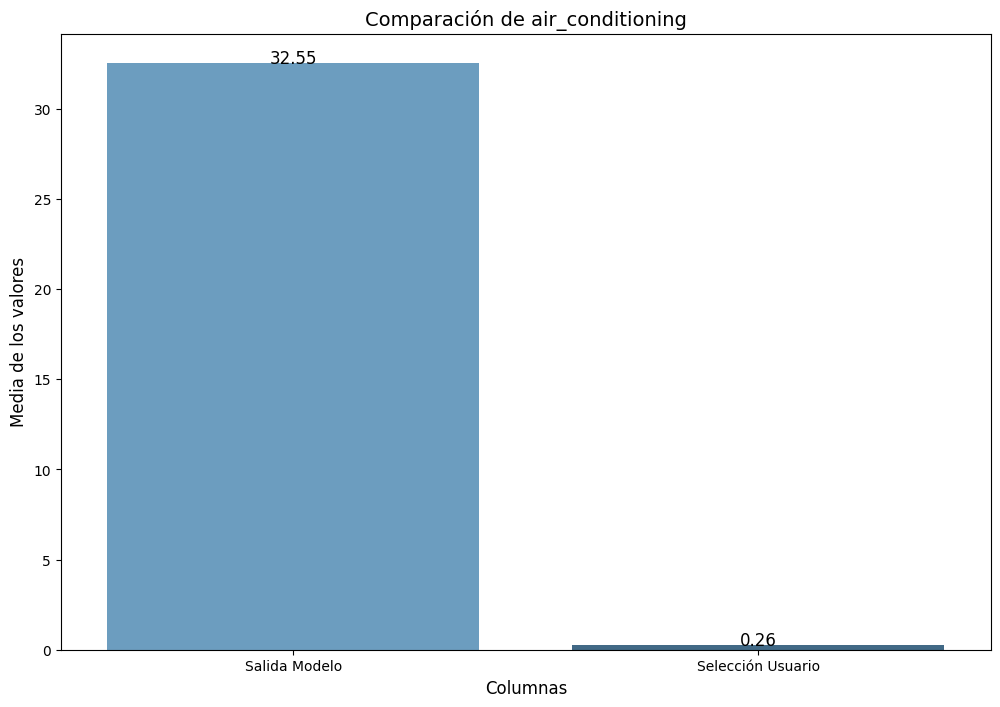

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


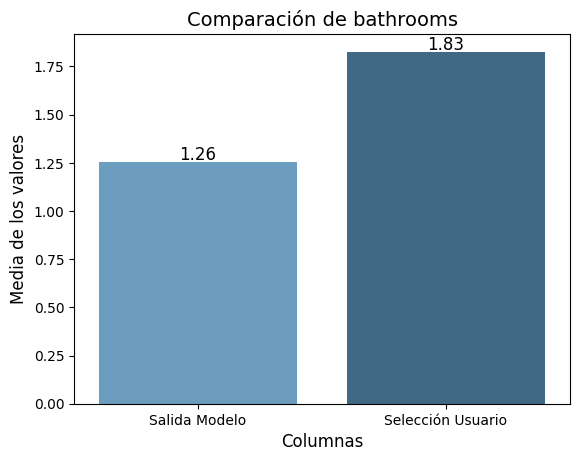

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


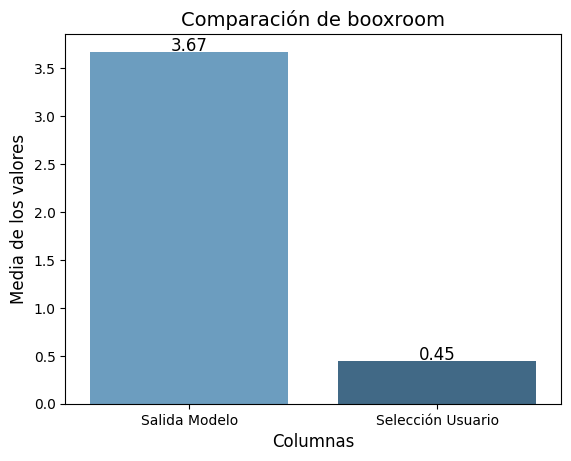

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


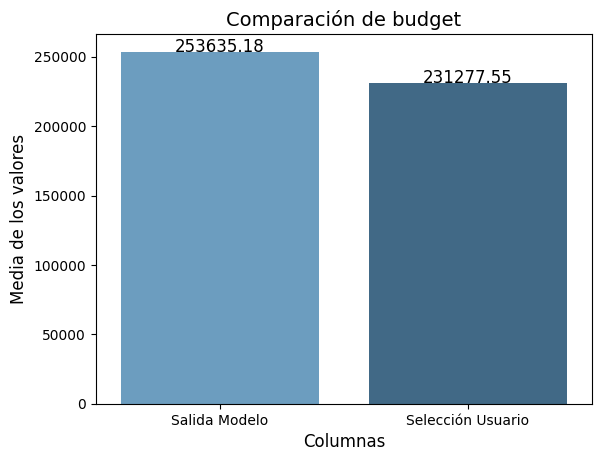

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


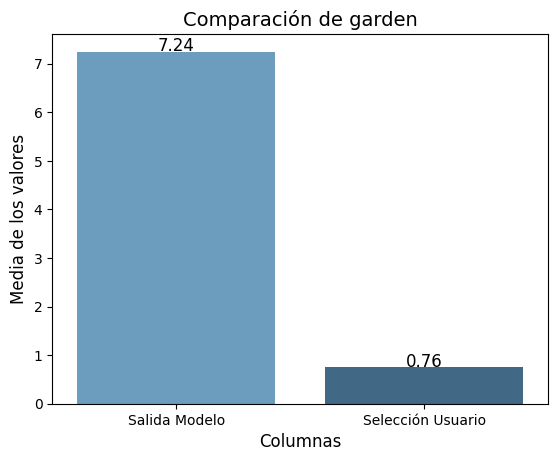

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


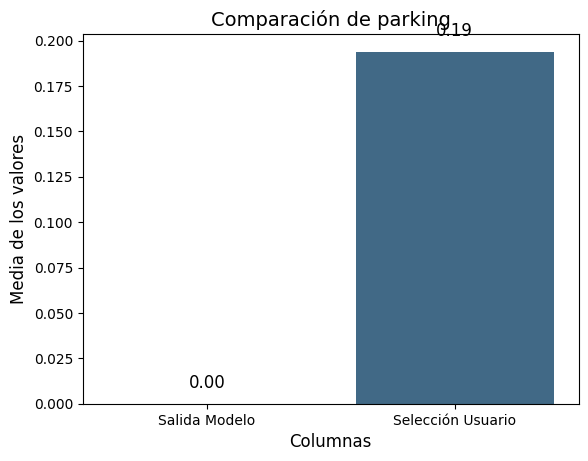

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


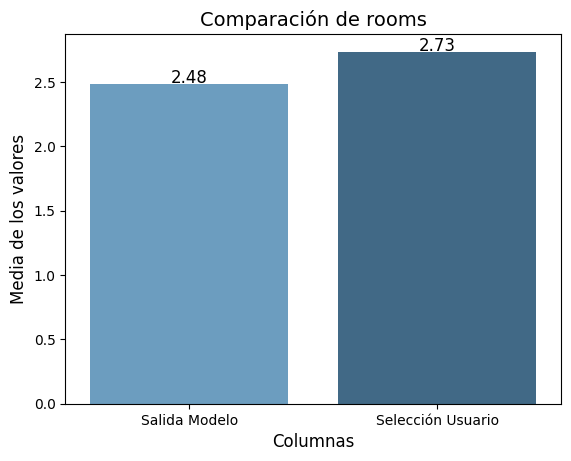

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


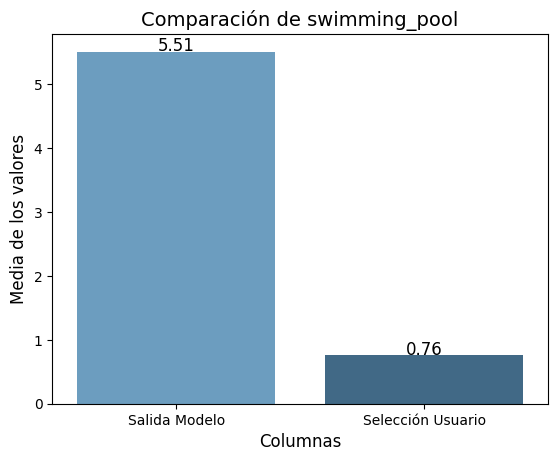

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


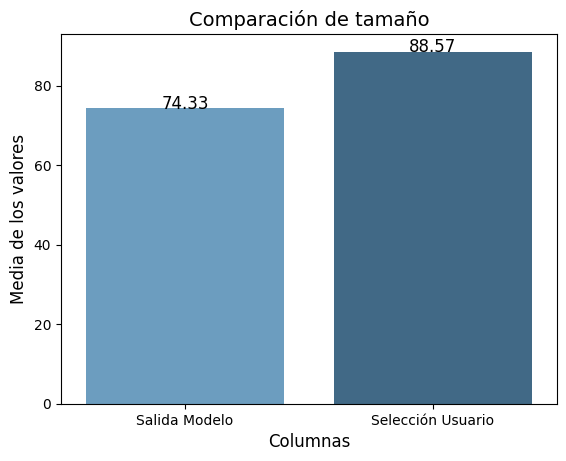

/tmp/ipykernel_7819/4216313939.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'],


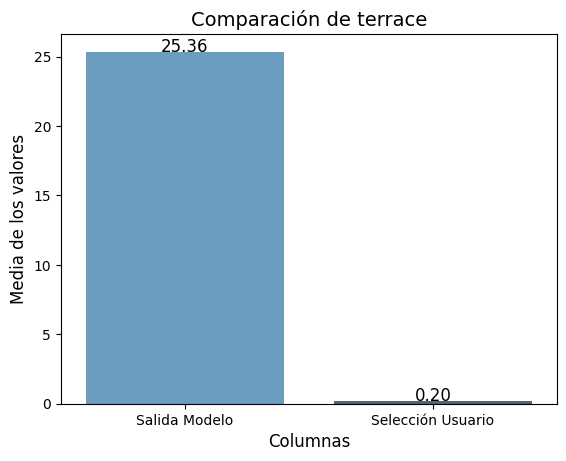

In [ ]:
# Comparamos las columnas de las características de la vivienda que ha seleccionado el usuario con las que ha seleccionado el modelo
columnas_x = ['air_conditioning_x', 'bathrooms_x', 'booxroom_x', 'budget_x', 'garden_x', 'parking_x', 
              'rooms_x', 'swimming_pool_x', 'tamaño_x', 'terrace_x']

columnas_y = ['air_conditioning_y', 'bathrooms_y', 'booxroom_y', 'budget_y', 'garden_y', 'parking_y', 
              'rooms_y', 'swimming_pool_y', 'tamaño_y', 'terrace_y']


comparacion_df = resultados[columnas_x + columnas_y]


plt.figure(figsize=(12, 8))

for i, col_x in enumerate(columnas_x):
    col_y = columnas_y[i]
    
  
    ax = sns.barplot(x=['Salida Modelo', 'Selección Usuario'], 
                     y=[comparacion_df[col_x].mean(), comparacion_df[col_y].mean()], 
                     palette="Blues_d", label=f'Comparación {col_x[:-2]}') 
    
    
    for j, value in enumerate([comparacion_df[col_x].mean(), comparacion_df[col_y].mean()]):
        ax.text(j, value + 0.009 , f'{value:.2f}', ha='center', fontsize=12)  

    
    plt.title(f'Comparación de {col_x[:-2]}', fontsize=14)  
    plt.ylabel('Media de los valores', fontsize=12)
    plt.xlabel('Columnas', fontsize=12)
    plt.show()
